<a href="https://colab.research.google.com/github/shunitavni/Speech-Emotion-Recognition/blob/master/LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model,Sequential
from keras import optimizers
from keras.layers import LSTM,Dense,Activation, Dropout
from keras.utils import to_categorical
from keras.models import load_model
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score


In [ ]:
def LSTM(input_shape):
	model = Sequential()
	model.add(LSTM(128, input_shape=(input_shape)))
	model.add(Dropout(0.5))
	model.add(Dense(32, activation='relu'))
	model.add(Dense(4, activation = 'softmax'))
 
	return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def load_data(test_size):
  X, y = [], []

  # with open('/content/drive/My Drive/final Project/csv/f_mel_happy.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
  #     for row in csvReader:
  #       X.append(row)

  # with open('/content/drive/My Drive/final Project/csv/labels_mel_happy.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile)
  #     for row in csvReader:
  #       y.append(0)

  # with open('/content/drive/My Drive/final Project/csv/f_mel_anger.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
  #     for row in csvReader:
  #       X.append(row)

  # with open('/content/drive/My Drive/final Project/csv/labels_mel_anger.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile)
  #     for row in csvReader:
  #         y.append(1)

  # with open('/content/drive/My Drive/final Project/csv/f_mel_sad.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
  #     for row in csvReader:
  #       X.append(row)

  # with open('/content/drive/My Drive/final Project/csv/labels_mel_sad.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile)
  #     for row in csvReader:
  #         y.append(2)

  # with open('/content/drive/My Drive/final Project/csv/f_mel_neutral.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
  #     for row in csvReader:
  #       X.append(row)

  # with open('/content/drive/My Drive/final Project/csv/labels_mel_neutral.csv') as csvDataFile:
  #     csvReader = csv.reader(csvDataFile)
  #     for row in csvReader:
  #         y.append(3)
#happy
  with open('/content/drive/My Drive/final Project/csv/f_mel_happy.csv') as csvDataFile:
      csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
      for row in csvReader:
        X.append(row)
        y.append(0)


#anger
  with open('/content/drive/My Drive/final Project/csv/f_mel_anger.csv') as csvDataFile:
      csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
      for row in csvReader:
        X.append(row)
        y.append(1)

#sad
  with open('/content/drive/My Drive/final Project/csv/f_mel_sad.csv') as csvDataFile:
      csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
      for row in csvReader:
        X.append(row)
        y.append(2)


#neutral
  with open('/content/drive/My Drive/final Project/csv/f_mel_neutral.csv') as csvDataFile:
      csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
      for row in csvReader:
        X.append(row)
        y.append(3)

#disgust
  with open('/content/drive/My Drive/final Project/csv/f_mel_disgust.csv') as csvDataFile:
      csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
      for row in csvReader:
        X.append(row)
        y.append(4)

#fear
  with open('/content/drive/My Drive/final Project/csv/f_mel_fear.csv') as csvDataFile:
      csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
      for row in csvReader:
        X.append(row)
        y.append(5)

  return train_test_split(np.array(X), y, test_size = test_size, random_state = 9)

In [ ]:
X_train, X_test, y_train, y_test = load_data(test_size = 0.25)

In [ ]:
	X_train = X_train.reshape(-1,X_train.shape[1],1)
	X_test = X_test.reshape(-1,X_test.shape[1],1)
	y_train = to_categorical(y_train)
	y_test = to_categorical(y_test)

In [ ]:
model=LSTM(input_shape=X_train.shape[1:])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

TypeError: ignored

In [ ]:
#model.load_weights("/content/drive/My Drive/final Project/")

In [ ]:
history = model.fit(X_train,y_train,epochs=120,batch_size=32)

In [ ]:
# model.save("/content/drive/My Drive/final Project/")
# model.save_weights("/content/drive/My Drive/final Project/")

In [ ]:
y_pred=model.predict(X_test)
class_labels=(0,1,2,3,4,5)
predicted_classes = np.argmax(y_pred, axis=1)
true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true = true, y_pred = predicted_classes)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.21%


Confusion matrix, without normalization
[[207  97  32  57]
 [ 79 361   9  18]
 [ 21   4 328  81]
 [ 41   8  66 257]]


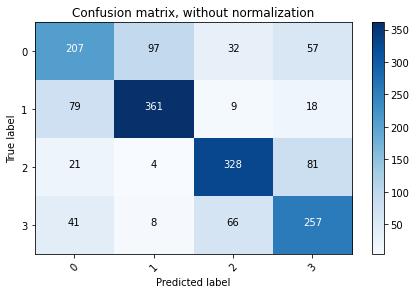

Normalized confusion matrix
[[52.6718 24.6819  8.1425 14.5038]
 [16.9165 77.3019  1.9272  3.8544]
 [ 4.8387  0.9217 75.576  18.6636]
 [11.0215  2.1505 17.7419 69.086 ]]


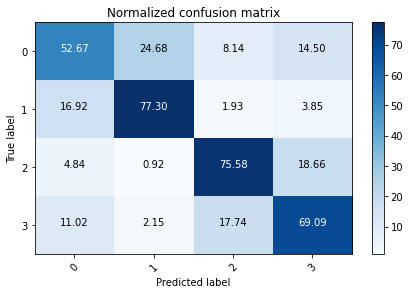

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()